# (Pycaret) House Price Prediction

Last Update : 2022/09/19

Pycaret Version : 2.3.10

Author : [jhbale11](https://github.com/jhbale11)

## Table of Contents

### [Import Libraries](#Import-the-Libraries)
### [Load Data](#Load-Data)

### 1. [Data Preprocessing](#Data-Preprocessing)
### 2. [Setup](#Setup)
### 3. [Compare Models](#Compare-Models)
### 4. [Create Model](#Create-Model)
### 5. [Tune Created Model](#Tune-Created-Model)
### 6. [Finalizing Model for Predictions](#Finalizing-Model-for-Predictions)
### 7. [Plot Model](#Plot-Model)
### 8. [Evaluate Model](#Evaluate-Model)
### 9. [Interpret Model](#Interpret-Model)
### 10. [Save and Load Model](#Save-and-Load-past-models)

# Import the Libraries

In [1]:
from pycaret.regression import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

plt.figure(figsize=(20,5))
plt.rcParams['font.family'] = 'NanumGothic'

<Figure size 1440x360 with 0 Axes>

In [2]:
from pycaret.utils import version
version()

'2.3.10'

# Load Data

- Dataset : [Kaggle - House Prices Predication](https://www.kaggle.com/code/omarreess/house-prices-predication/data)
- Columns : `80` features related to House Prices
- Rows : `1460` records

In [3]:
import os
os.getcwd()

'/home/jhbale11/Pycaret/House Price Predication'

### Dataset Description

- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [4]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(data.shape, test.shape)

(1460, 81) (1459, 80)


In [5]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Preprocessing

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


# Setup

To start with Pycaret, the first step is to import all methods and attributes from pycaret's regression model

Pycaret workflow always starts with `setup` function which prepares the environment for the entire ML pipeline. 

Thus `setup` must be executed before any other functions.

### Parameters
- data : Input data
- target : Predication target column
- session_id : Set random seed
- normalize : Data normalization
- normalize_method : 'zscore', 'minmax', 'maxabs', 'robust'
- transformation : Make data samples distribution more like gaussian
- remove_outliers
- remove_multicollinearity
- ignore_low_variance
- combine_rare_levels

In [8]:
demo = setup(data = data, 
             target = 'SalePrice', 
             ignore_features = ['Alley','PoolQC','MiscFeature','Fence','FireplaceQu','Utilities'],
             session_id = 123,
             normalize = True,
             transformation= True, 
             transformation_method = 'yeo-johnson', 
             transform_target = True, 
             remove_outliers= True,
             remove_multicollinearity = True,
             ignore_low_variance = True, 
             combine_rare_levels = True) 

,Description,Value
0,session_id,123
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,55
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(970, 242)"


# Compare Models

Once the `setup` is excuted, we can use `compare_model()` to briefly evaluate the performance of all the models in the model library of Pycaret. This function train all the models available in the model library and scores them using stratified cross validation. 

The output prints a score grid MAE, MSE, RMSE, R2, RMSLE, MAPE and TT.

### Compare models in pycaret.regression library

In [9]:
comp_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,14669.4732,853562563.9920,25776.9772,0.8770,0.1234,0.0859,0.0500
br,Bayesian Ridge,15025.6369,894056326.8541,26772.2773,0.8733,0.1232,0.0860,0.0160
lightgbm,Light Gradient Boosting Machine,17353.9792,884942448.3361,28742.3573,0.8705,0.1405,0.0989,0.0340
ridge,Ridge Regression,16045.7850,938103526.1673,27904.7939,0.8653,0.1291,0.0912,0.1310
gbr,Gradient Boosting Regressor,17597.0921,1113334564.5658,31114.8778,0.8408,0.1392,0.0983,0.0760
rf,Random Forest Regressor,19164.3018,1119003300.1231,32372.2671,0.8352,0.1512,0.1075,0.2110
omp,Orthogonal Matching Pursuit,17194.2772,1173293647.2278,31378.8222,0.8318,0.1366,0.0962,0.1310
par,Passive Aggressive Regressor,20748.1368,1183172590.2980,32949.4609,0.8170,0.1515,0.1161,0.0090
knn,K Neighbors Regressor,20981.7502,1345023139.0658,35662.9246,0.8014,0.1606,0.1137,0.0230
et,Extra Trees Regressor,21808.5590,1532600327.4254,38052.4489,0.7712,0.1714,0.1196,0.2190


### Check model list in `models()`, after `setup()` you can now see what models will be used

In [10]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# Create Model

In [11]:
huber = create_model('huber')
print(huber)
bayridge = create_model('br')
print(bayridge)
ridge = create_model('ridge')
print(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19372.7935,4077788182.1001,63857.5617,0.4867,0.1885,0.1110
1,17118.3998,664129918.3495,25770.7182,0.9022,0.1307,0.0939
2,15024.4976,475666114.1418,21809.7711,0.8979,0.1236,0.0915
3,13867.2481,425630374.9554,20630.8113,0.9163,0.1043,0.0777
4,16880.7334,979811253.4205,31301.9369,0.9005,0.1520,0.1008
5,18835.8090,950448237.4514,30829.3405,0.8723,0.1311,0.0987
6,14422.8012,409579446.3987,20238.0692,0.8999,0.1096,0.0825
7,15799.7513,528643119.0361,22992.2404,0.9235,0.1197,0.0886
8,14406.0802,380960961.6926,19518.2213,0.9408,0.1104,0.0833


PowerTransformedTargetRegressor(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=Ridge(alpha=1.0, copy_X=True,
                                                fit_intercept=True,
                                                max_iter=None, normalize=False,
                                                random_state=123, solver='auto',
                                                tol=0.001),
                                solver='auto', tol=0.001)


# Tune Created Model

In [12]:
huber = tune_model(huber)
bayridge = tune_model(bayridge)
ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18898.1312,4140966454.8663,64350.3415,0.4788,0.1927,0.1089
1,15479.0949,562346127.9676,23713.8383,0.9172,0.1223,0.0862
2,13455.5417,376358117.1121,19399.9515,0.9192,0.1119,0.0824
3,13907.3268,450218612.5287,21218.3556,0.9115,0.1036,0.0771
4,15986.7630,1007405579.8776,31739.6531,0.8977,0.1518,0.0974
5,16357.0258,784336150.9500,28006.0021,0.8946,0.1159,0.0850
6,13632.0380,348107205.1160,18657.6313,0.9149,0.1055,0.0800
7,15219.8522,466497771.1979,21598.5595,0.9325,0.1219,0.0885
8,12975.6423,298674698.4332,17282.2076,0.9535,0.0929,0.0732


In [13]:
blender = blend_models(estimator_list = [huber, bayridge, ridge])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18621.6874,4265516167.9396,65310.9192,0.4631,0.1923,0.1079
1,14728.9339,503478961.1625,22438.3369,0.9259,0.1193,0.0830
2,12951.7433,333283996.2902,18256.0674,0.9284,0.1093,0.0806
3,13511.3087,442639185.9445,21038.9920,0.9129,0.1028,0.0756
4,15034.1626,788143387.2153,28073.8916,0.9199,0.1466,0.0944
5,15675.9376,704936777.7743,26550.6455,0.9053,0.1121,0.0819
6,13484.3339,333981792.6819,18275.1687,0.9184,0.1033,0.0786
7,14430.6172,436801055.6807,20899.7860,0.9368,0.1187,0.0833
8,12173.8060,250951428.1166,15841.4465,0.9610,0.0906,0.0709


# Finalizing Model for Predictions

In [14]:
model = finalize_model(blender)
predictions = predict_model(model, data=test)

/home/jhbale11/anaconda3/envs/junghwan/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jhbale11/anaconda3/envs/junghwan/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/jhbale11/anaconda3/envs/junghwan/lib/python3.7/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

In [15]:
predictions

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,135647.919645
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,185824.074657
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,209050.127745
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,222506.121922
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,209092.039705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,96027.099336
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,90399.020243
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,186515.206868
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,133746.433660


# Plot Model

The `plot_model()` function provides tools to further analyze the performance of a model.

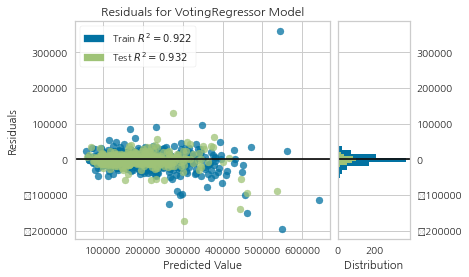

In [16]:
plot_model(model)

# Evaluate Model

In [17]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpret Model

The `interpret_model()` function will return an interpretation plot based on the test/ hold-out set.

It only supports tree based algorithms based on [SHAP(SHapley Additive exPlanations)](https://shap.readthedocs.io/en/latest/)

In [ ]:
lightgbm = create_model('lightgbm')
interpret_model(lightgbm)

# Save and Load past models

In [19]:
save_model(model, './final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Alley', 'PoolQC',
                                                        'MiscFeature', 'Fence',
                                                        'FireplaceQu',
                                                        'Utilities'],
                                       id_columns=['Id'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',...
                                                                                                       compute_score=True,
                                         

In [20]:
load_model = load_model('./final_model')
load_model['trained_model']

Transformation Pipeline and Model Successfully Loaded


PowerTransformedTargetRegressor(estimators=[('huber',
                                             HuberRegressor(alpha=0.01,
                                                            epsilon=1.1,
                                                            fit_intercept=True,
                                                            max_iter=100,
                                                            tol=1e-05,
                                                            warm_start=False)),
                                            ('br',
                                             BayesianRidge(alpha_1=0.3,
                                                           alpha_2=1e-06,
                                                           alpha_init=None,
                                                           compute_score=True,
                                                           copy_X=True,
                                                           fit_intercept

# Make Submission File

In [21]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.columns

Index(['Id', 'SalePrice'], dtype='object')

In [22]:
sub = pd.DataFrame({
    "Id" : predictions['Id'],
    "SalePrice" : predictions['Label']
}
)

sub.to_csv('submission.csv', index=False)